# SVP global drifting buoys

In this lecture, we will use a large data set of satellite-tracked buoys, to compute the mean circulation around the Hawaiian islands. 

![](http://marlin-yug.com/assets/images/Products/SVP-B.GIF)

### World Ocean Circulation Experiment drifting buoy principle 

![](http://nettuno.ogs.trieste.it/jungo/argoitaly/image/gerin/Egypt003.JPG)

### A WOCE buoy before deployment 

In [1]:
import scipy.io as sio
import numpy as np

In [2]:
drifter = sio.loadmat('/home/ocn463-data/woce/drift/drift.mat')

The WOCE satellite-tracked buoys data for the Hawaiian area is here. It covers more than 10 years. Let's first look at all the buoys:

In [3]:
drifter.keys()

dict_keys(['__header__', '__version__', '__globals__', 'U', 'V', 'Lon', 'Lat', 'id', 'coast'])

In [4]:
drifter['U'].shape

(418660, 1)

U and V have been pre-computed from the randomly-space ARGOS satellite fixes, and co-located to the interpolated latitude-longitude. The variables of interest to us are:

In [8]:
Lat = drifter['Lat']
Lon = drifter['Lon']
U = drifter['U']
V = drifter['V']
id = drifter['id']
coast = drifter['coast']

In [9]:
whos

Variable   Type           Data/Info
-----------------------------------
Lat        ndarray        418660x1: 418660 elems, type `float64`, 3349280 bytes (3.194122314453125 Mb)
Lon        ndarray        418660x1: 418660 elems, type `float64`, 3349280 bytes (3.194122314453125 Mb)
U          ndarray        418660x1: 418660 elems, type `float64`, 3349280 bytes (3.194122314453125 Mb)
V          ndarray        418660x1: 418660 elems, type `float64`, 3349280 bytes (3.194122314453125 Mb)
ax         AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
coast      ndarray        1831x2: 3662 elems, type `float64`, 29296 bytes
drifter    dict           n=9
fig        Figure         Figure(864x864)
id         ndarray        418660x1: 418660 elems, type `float64`, 3349280 bytes (3.194122314453125 Mb)
np         module         <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
plt        module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sio        module         <module 'scipy

Text(0.5, 1.0, 'Drifter locations')

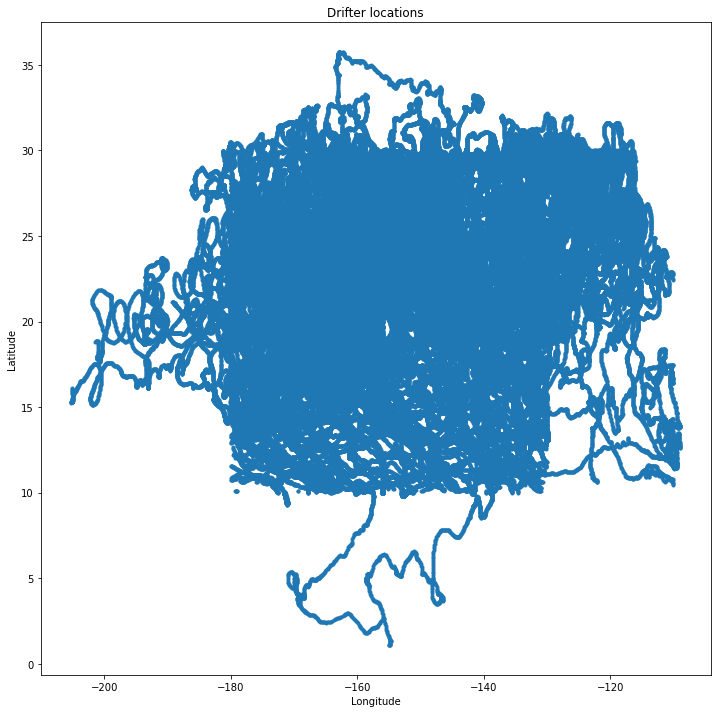

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(Lon, Lat, '.')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Drifter locations')

The data set covers 10 N to 30 N and 130 W to 180 W, or 100 deg^2. On average, there are about

In [11]:
len(id)/(20*50)

418.66

points per square degree. To have a graphic idea of the density of data, let's look at a 2x2 deg^2 box centered on (-160,20):

(19.0, 21.0)

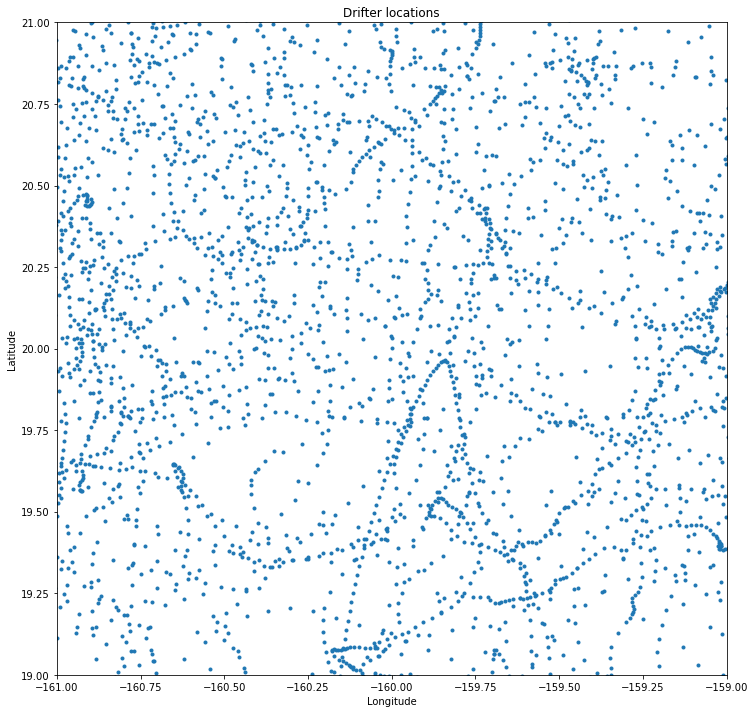

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(Lon, Lat, '.')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Drifter locations')
ax.set_xlim(-161, -159)
ax.set_ylim(19, 21)

Let's compute the median currents in this box. First, we need to find the indices (in the 418660x1 matrices) of all the buoys that crossed the box, and compute the median currents in this box:

In [13]:
# limit lats and lons, then find all values in both and sort
boxlat = np.where(np.absolute(Lat-20) < 1)[0]
boxlon = np.where(np.absolute(Lon+160) < 1)[0]
box = np.array(sorted(set(boxlat) & set(boxlon)))
box.shape

(2773,)

What are the median velocities in the box?

In [14]:
np.median(U[box]), np.median(V[box])

(0.02416794875609749, 0.0701)

We use median rather than mean, because the median is robust to outliers (unflagged bad data), while the mean is not. The mean currents in this box are:

In [15]:
np.mean(U[box]), np.mean(V[box])

(0.0007300161124620394, 0.057987531735318516)

Means are different from medians because the distributions are skewed. You can see this in the histograms:

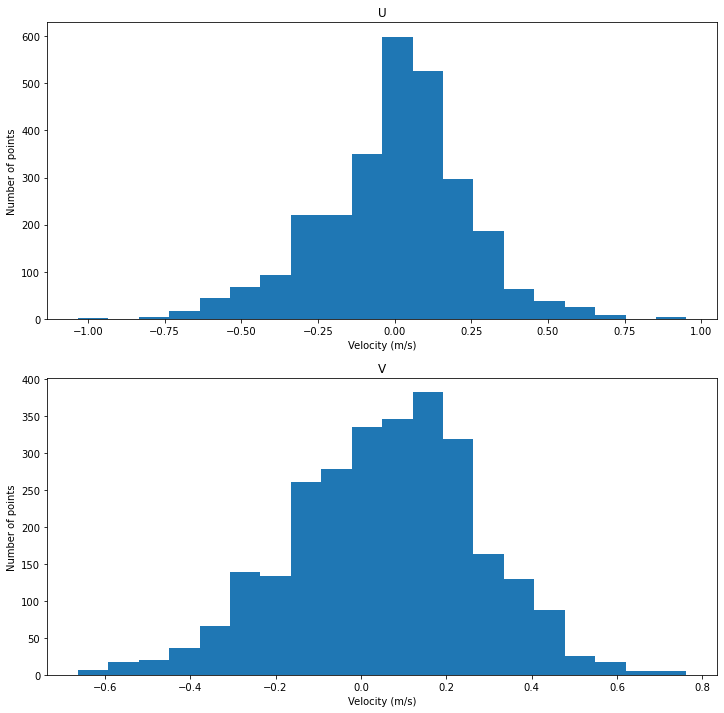

In [16]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
ax[0].hist(U[box],20);
ax[0].set_title('U')
ax[1].hist(V[box],20);
ax[1].set_title('V')
for axes in ax:
    axes.set_ylabel('Number of points')
    axes.set_xlabel('Velocity (m/s)')


Likewise, the standard deviations are

In [17]:
np.std(U[box]), np.std(V[box])

(0.2417194863660976, 0.2187069218930997)

reflecting the energetic eddies present in the area, much larger than the mean currents. 

Of course our interest is to construct a map of mean currents, not just estimate them at a single point. For this we must define a grid. The grid resolution is a matter of compromise between precision and resolution: finer resolution will yield less buoys crossing each box, thus larger standard errors on the estimation of the mean, while coarser resolution will yield more precise estimation of the mean velocities. We chose a grid resolution of 2x2 deg., which is a good compromise; see (-160,20) above.

We define two matrices cenlon and cenlat containing the (lon,lat) of each grid point (center of each box). cenlon is a matrix in which all lines are identical to each other, and cenlat is a matrix in which all columns are identical to each other. We populate the cenlon matrix by creating the first line with longitudes [-179:2:-131], and then replicating it for all latitudes. Likewise, we populate the cenlat matrix by populating the first column with latitudes [11:2:29], and the replicating it for all longitudes. In practice:

In [18]:
cenlon, cenlat = np.meshgrid(np.arange(-179, -130.9, 2), np.arange(11, 29.1, 2))

Here they are, filled:

In [19]:
cenlon

array([[-179., -177., -175., -173., -171., -169., -167., -165., -163.,
        -161., -159., -157., -155., -153., -151., -149., -147., -145.,
        -143., -141., -139., -137., -135., -133., -131.],
       [-179., -177., -175., -173., -171., -169., -167., -165., -163.,
        -161., -159., -157., -155., -153., -151., -149., -147., -145.,
        -143., -141., -139., -137., -135., -133., -131.],
       [-179., -177., -175., -173., -171., -169., -167., -165., -163.,
        -161., -159., -157., -155., -153., -151., -149., -147., -145.,
        -143., -141., -139., -137., -135., -133., -131.],
       [-179., -177., -175., -173., -171., -169., -167., -165., -163.,
        -161., -159., -157., -155., -153., -151., -149., -147., -145.,
        -143., -141., -139., -137., -135., -133., -131.],
       [-179., -177., -175., -173., -171., -169., -167., -165., -163.,
        -161., -159., -157., -155., -153., -151., -149., -147., -145.,
        -143., -141., -139., -137., -135., -133., -131.],


In [20]:
cenlat

array([[11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
        13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.],
       [15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
        15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
       [17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.,
        17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17., 17.],
       [19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.,
        19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19., 19.],
       [21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.],
       [23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.,
        23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.],
      

We are now ready to compute the mean currents:

In [22]:
Umean = np.nan * np.ones_like(cenlon)
Vmean = np.nan * np.ones_like(cenlon)

for ilat in range(cenlon.shape[0]):
    for ilon in range(cenlon.shape[1]):
        boxlat = np.where(np.absolute(Lat-cenlat[ilat, ilon]) < 1)[0]
        boxlon = np.where(np.absolute(Lon-cenlon[ilat, ilon]) < 1)[0]
        box = np.array(sorted(set(boxlat) & set(boxlon)))
        Umean[ilat, ilon] = np.mean(U[box])
        Vmean[ilat, ilon] = np.mean(V[box])

It takes a little while to compute, but then it is trivial to plot the mean currents; we add Oahu coastline for reference.

(10.0, 32.0)

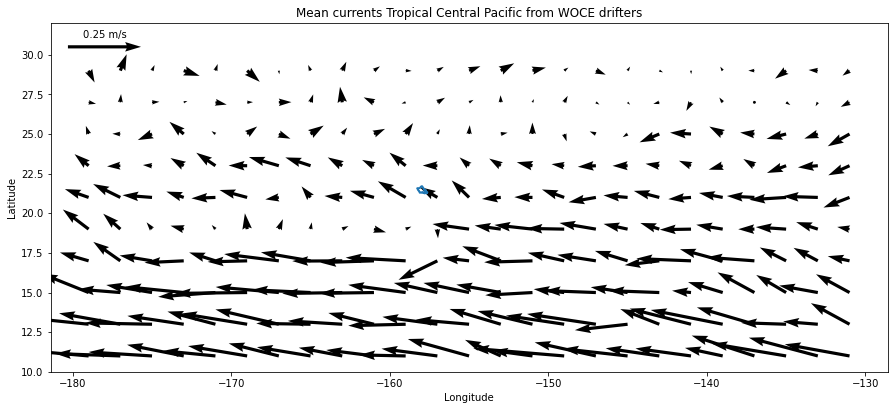

In [23]:
fig, ax = plt.subplots(figsize=(15,12))
q = ax.quiver(cenlon, cenlat, Umean, Vmean)
ax.quiverkey(q, -178, 30.5, 0.25, '0.25 m/s', coordinates='data')
ax.plot(coast[:,0], coast[:,1], linewidth=2)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Mean currents Tropical Central Pacific from WOCE drifters')
ax.set_aspect('equal')
ax.set_ylim(10, 32)

The mean currents show the well-defined southern part of the North Pacific gyre, with the westward North Equatorial Current (NEC) intensifying from the latitude of Hawaii, down to a maximum at 12N. 